Notion 1: transorm *logged values* to percents by (exp(logged_value) - 1) * 100  

2021, Quantitative Data Analysis class  
author: Tsimokha Dmitriy

In [1]:
setwd('~/Documents/github/da2021/sem1')
load('LM3.RData')
Germany$log_alcwkdyn <- log(Germany$alcwkdyn)
Germany$log_alcwkndn <- log(Germany$alcwkndn)

In [4]:
library(sjPlot)
library(ggplot2)

In [142]:
options(repr.plot.width = 20, repr.plot.height = 15, digits=3)
theme_set(theme_bw(base_size = 35))
update_geom_defaults("smooth", list(size = 5))

# Task 1
Specify two models to predict the amount of alcohol consumed on weekends and weekdays by the respondents’education, gender, income,and age.  
Please, use the log of the amount of alcohol.  
Interpret the results(coefficients, R^2).  

In [5]:
modelDays <- lm(data = Germany, log_alcwkdyn ~ eduyrsn + gndr + incdec + age)
modelEnds <- lm(data = Germany, log_alcwkndn ~ eduyrsn + gndr + incdec + age)

## Model for weekdays:

In [6]:
summary(modelDays)


Call:
lm(formula = log_alcwkdyn ~ eduyrsn + gndr + incdec + age, data = Germany)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0173 -0.2585  0.2697  0.8169  2.9969 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.332163   0.199796  11.673   <2e-16 ***
eduyrsn      0.011611   0.009421   1.233   0.2179    
gndrFemale  -0.549169   0.059106  -9.291   <2e-16 ***
incdec       0.020159   0.011504   1.752   0.0799 .  
age          0.002968   0.002208   1.344   0.1791    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.308 on 1995 degrees of freedom
  (476 observations deleted due to missingness)
Multiple R-squared:  0.04825,	Adjusted R-squared:  0.04634 
F-statistic: 25.29 on 4 and 1995 DF,  p-value: < 2.2e-16


In [186]:
cat('Coefficients in percents:'); cat('\n')
cat('    Years of Education:', (exp(modelDays$coef['eduyrsn'])-1)*100); cat('\n')
cat('    Gender:', (exp(-0.549169)-1)*100); cat('\n')
cat('    Indices of Income:', (exp(modelDays$coef['incdec'])-1)*100); cat('\n')
cat('    Age:', (exp(modelDays$coef['age'])-1)*100); cat('\n')

Coefficients in percents:
    Years of Education: 1.17
    Gender: -42.3
    Indices of Income: 2.04
    Age: 0.297


In the first model for alcohol consumption on **weekdays** only effect of **gender** is significant - **females** consume *on 42.3% lower amount of alcohol than males* on weekdays than males.  

Overall prediction power is small = **0.046** which is lower than 5% of explained variance.  

## Model for weekends:

In [7]:
summary(modelEnds)


Call:
lm(formula = log_alcwkndn ~ eduyrsn + gndr + incdec + age, data = Germany)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6197 -0.4204  0.1378  0.6590  2.8277 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.439398   0.158218  21.738  < 2e-16 ***
eduyrsn      0.017700   0.007471   2.369   0.0179 *  
gndrFemale  -0.545913   0.046832 -11.657  < 2e-16 ***
incdec       0.009871   0.009127   1.081   0.2796    
age         -0.009570   0.001751  -5.467 5.15e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.036 on 1994 degrees of freedom
  (477 observations deleted due to missingness)
Multiple R-squared:  0.0917,	Adjusted R-squared:  0.08988 
F-statistic: 50.33 on 4 and 1994 DF,  p-value: < 2.2e-16


In the second model for alcohol consumption on **weekends** only effect of **Income Decile** is unsignificant:  
- for **Years of Education**: on 1% more consumed alcohol per each year  
- for **Gender**: same 54% less consumed alcohol for females  
- for **Age**: for ~1% less consumed alcohol per each year  

Overall prediction power is higher than in model for weekdays, nearly ~9% of explained variance.

# Task 2
Estimate the interaction terms between gender and education and between income and age in both models.  
Interpret the results.  

In [8]:
modelDaysI <- update(modelDays, . ~ . + eduyrsn:gndr + incdec:age)
modelEndsI <- update(modelEnds, . ~ . + eduyrsn:gndr + incdec:age)

## Model for weekdays:

In [9]:
summary(modelDaysI)


Call:
lm(formula = log_alcwkdyn ~ eduyrsn + gndr + incdec + age + eduyrsn:gndr + 
    incdec:age, data = Germany)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9143 -0.2643  0.2661  0.8126  3.0633 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.0833729  0.3106837   6.706  2.6e-11 ***
eduyrsn             0.0068925  0.0125266   0.550  0.58222    
gndrFemale         -0.7451353  0.2771802  -2.688  0.00724 ** 
incdec              0.0734413  0.0361606   2.031  0.04239 *  
age                 0.0103204  0.0051695   1.996  0.04602 *  
eduyrsn:gndrFemale  0.0124239  0.0175572   0.708  0.47926    
incdec:age         -0.0012452  0.0008069  -1.543  0.12297    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.308 on 1993 degrees of freedom
  (476 observations deleted due to missingness)
Multiple R-squared:  0.04957,	Adjusted R-squared:  0.04671 
F-statistic: 17.32 on 6 and 1993 DF,  p-value:

Significant effects only for Gender, Income Decile and Age:  
- for **Gender**: lower alcohol consumption on 74% for females  
- for **Income Decile**: 7% more per each level  
- for **Age**: 1% more per each year  

Nearly the same prediction power as with model without interactions.

## Model for weekends:

In [12]:
summary(modelEndsI)


Call:
lm(formula = log_alcwkndn ~ eduyrsn + gndr + incdec + age + eduyrsn:gndr + 
    incdec:age, data = Germany)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5662 -0.4366  0.1238  0.6590  2.8195 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.0471372  0.2461386  16.443  < 2e-16 ***
eduyrsn             0.0023227  0.0098992   0.235   0.8145    
gndrFemale         -0.9994575  0.2194637  -4.554 5.58e-06 ***
incdec             -0.0544334  0.0286213  -1.902   0.0573 .  
age                -0.0180937  0.0041070  -4.406 1.11e-05 ***
eduyrsn:gndrFemale  0.0297578  0.0138965   2.141   0.0324 *  
incdec:age          0.0015419  0.0006396   2.411   0.0160 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.034 on 1992 degrees of freedom
  (477 observations deleted due to missingness)
Multiple R-squared:  0.09671,	Adjusted R-squared:  0.09399 
F-statistic: 35.54 on 6 and 1992 DF,  p-value:

Significant effects for Gender, Age and for both interaction effects:  
- for **Gender**: almost 100% lower for females!  
- for **Age**: 1% less per each year  

Slightly better prediction power as with model without interactions.

# Task 3
Visualize the estimated interaction terms and comment on the results.

## For weekdays:

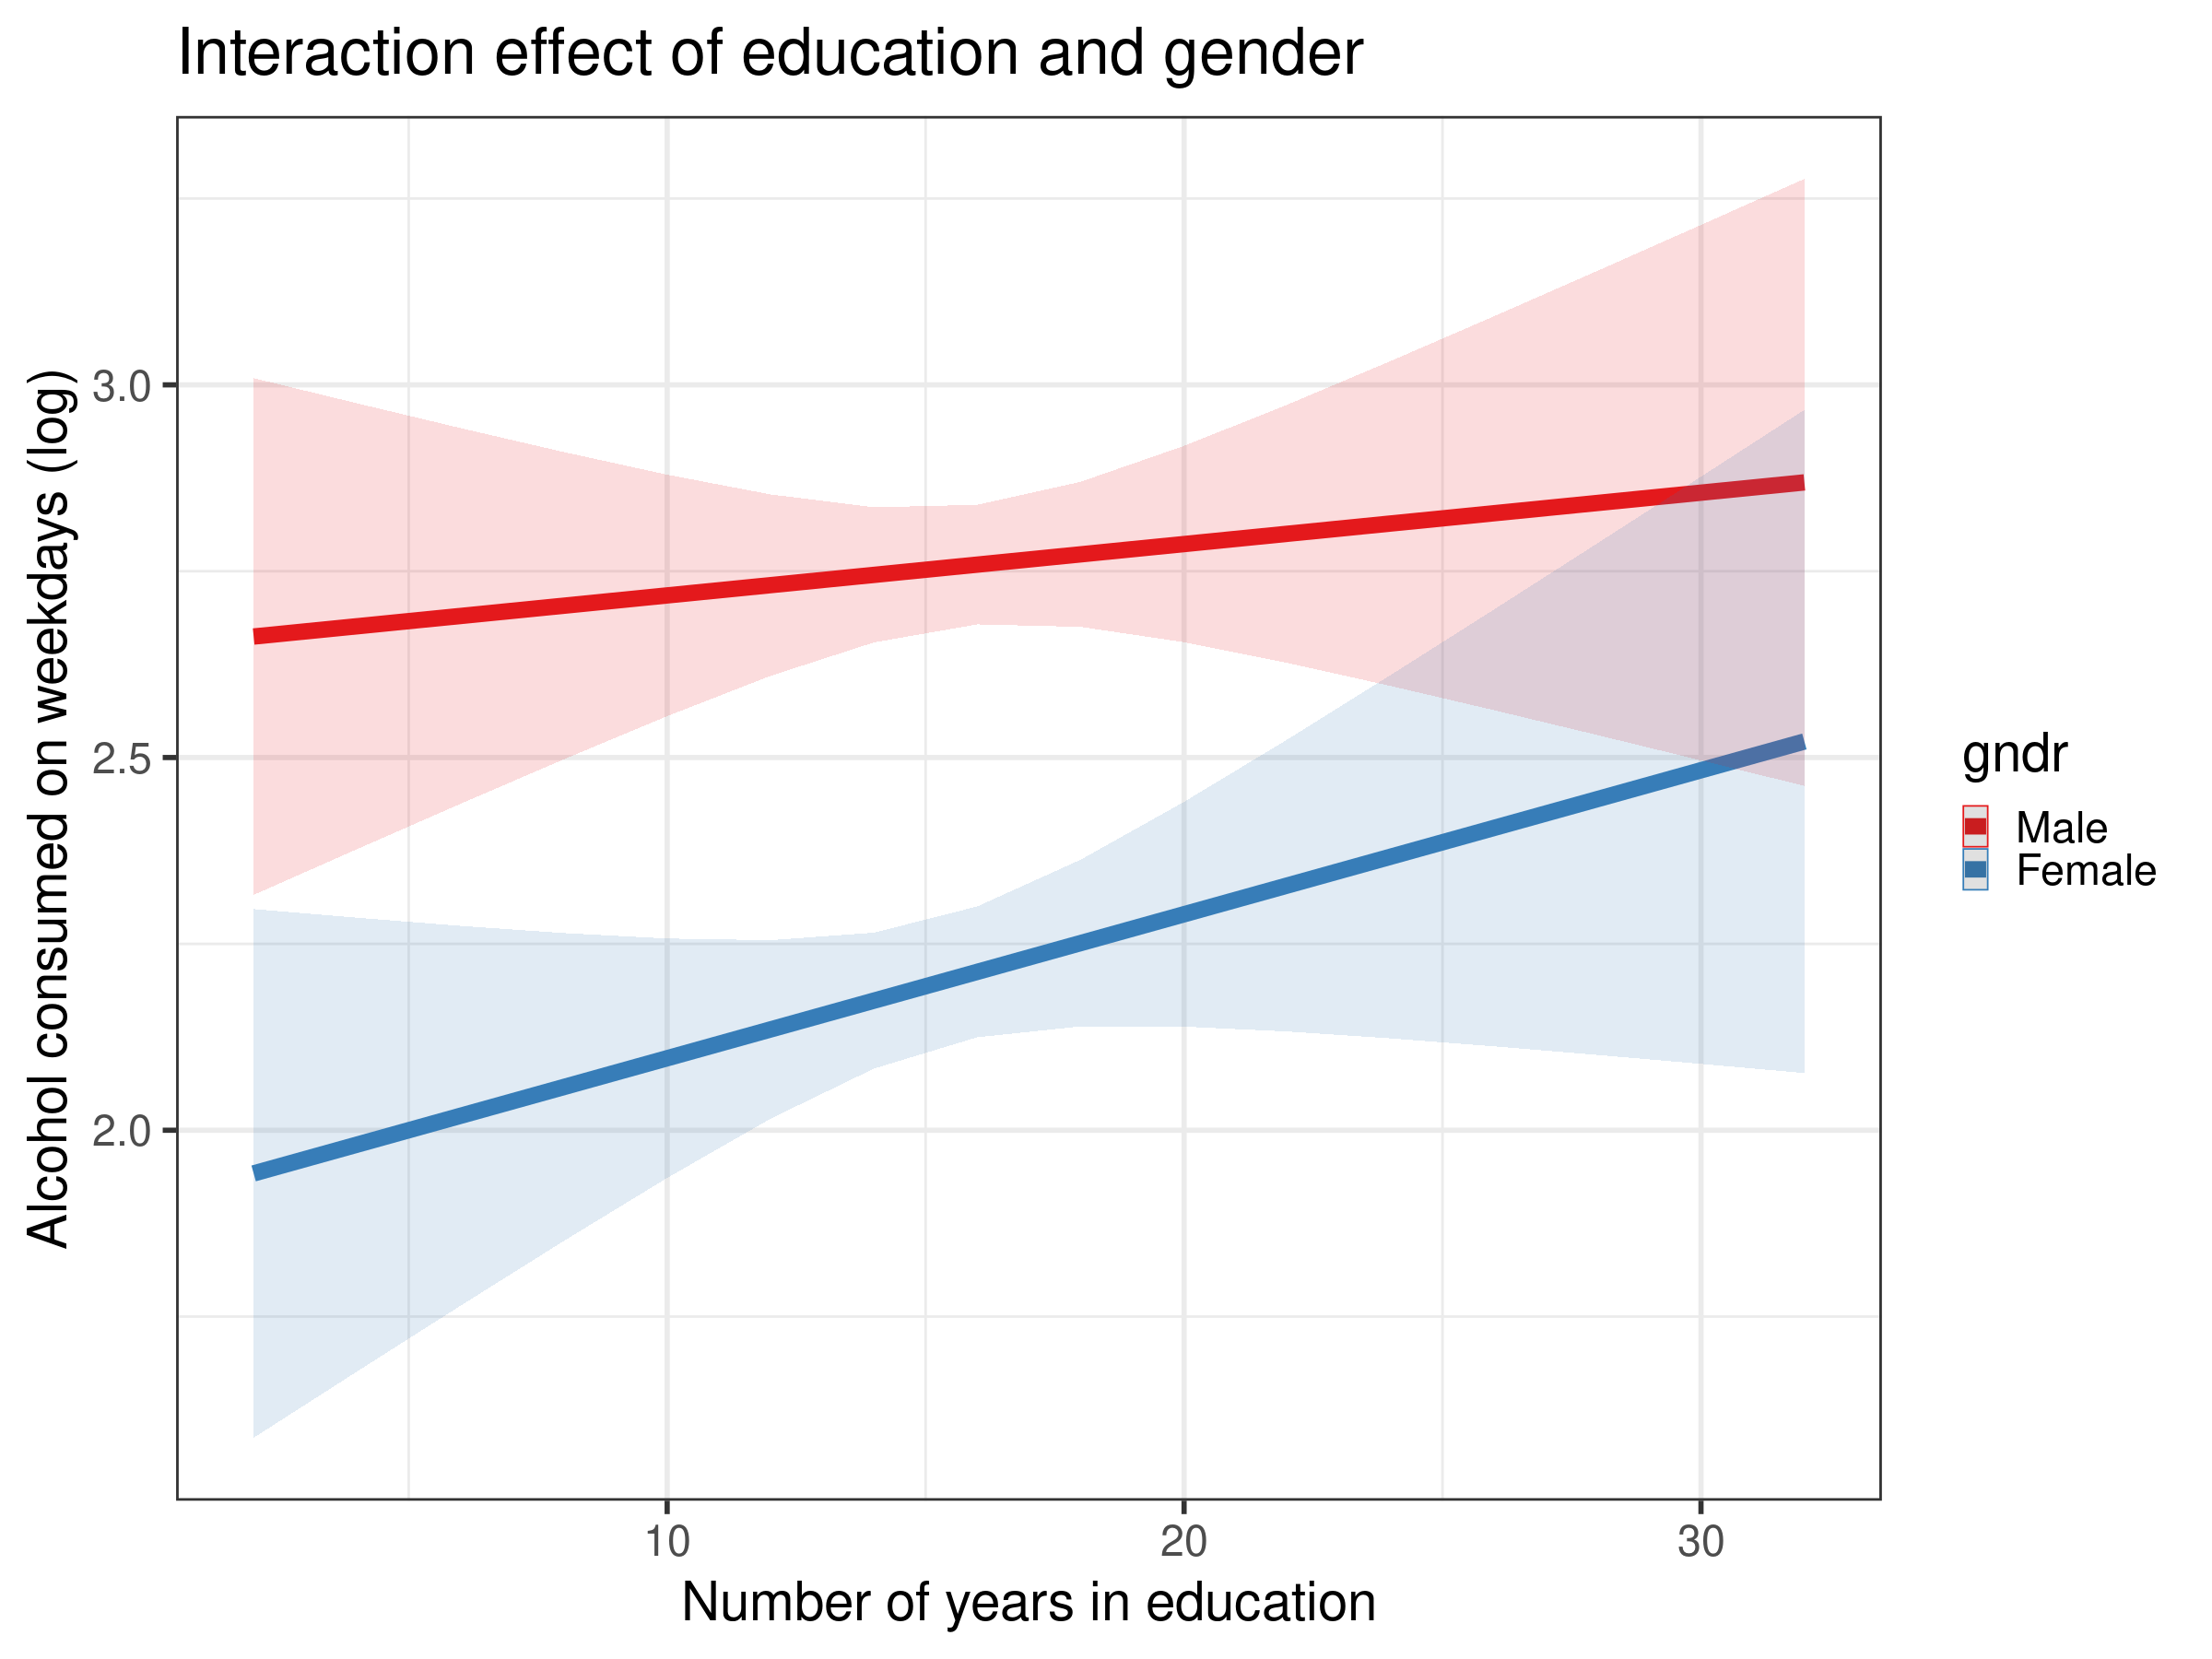

In [13]:
plot_model(modelDaysI, line.size = 5,
           type = "pred", terms=c("eduyrsn", "gndr"),
           title = "Interaction effect of education and gender", 
           axis.title= c("Number of years in education", 
                         "Alcohol consumed on weekdays (log)"))

Unsignificant interaction - nothing to interpret.

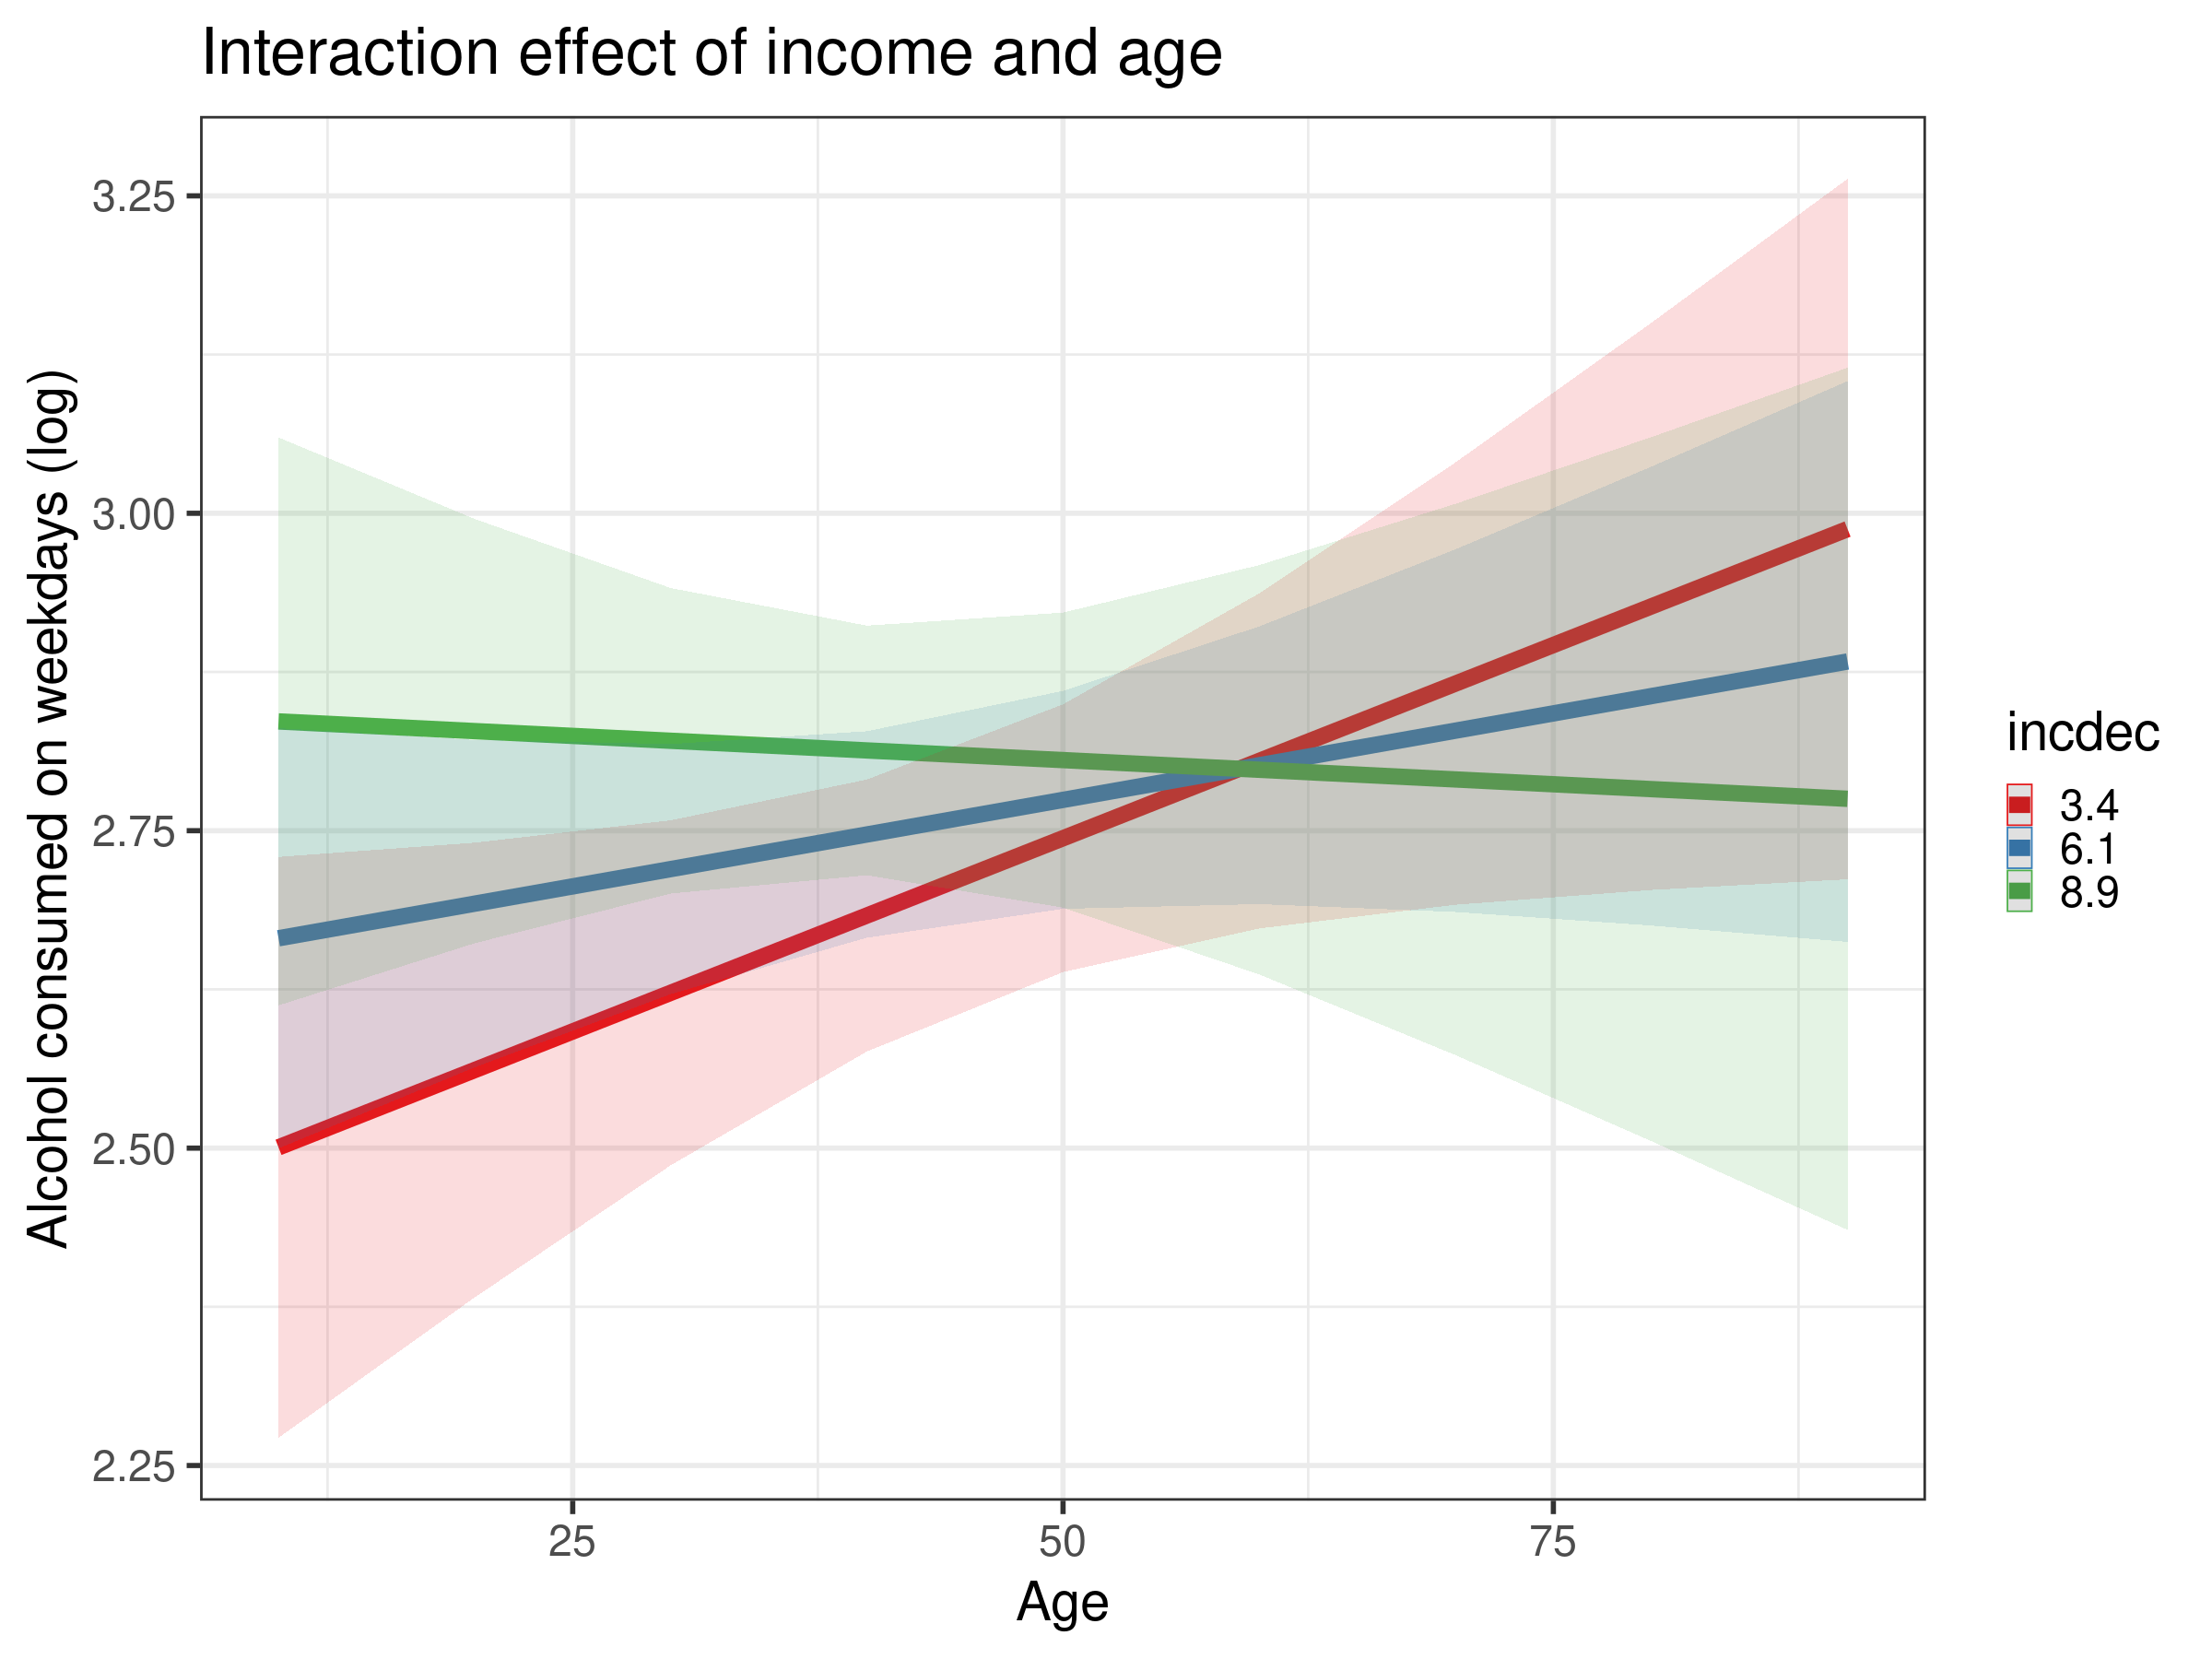

In [14]:
plot_model(modelDaysI, line.size = 5,
           type = "pred", terms=c("age", "incdec"),
           title = "Interaction effect of income and age", 
           axis.title= c("Age", 
                         "Alcohol consumed on weekdays (log)"))

Unsignificant interaction - nothing to interpret.

## For weekends:

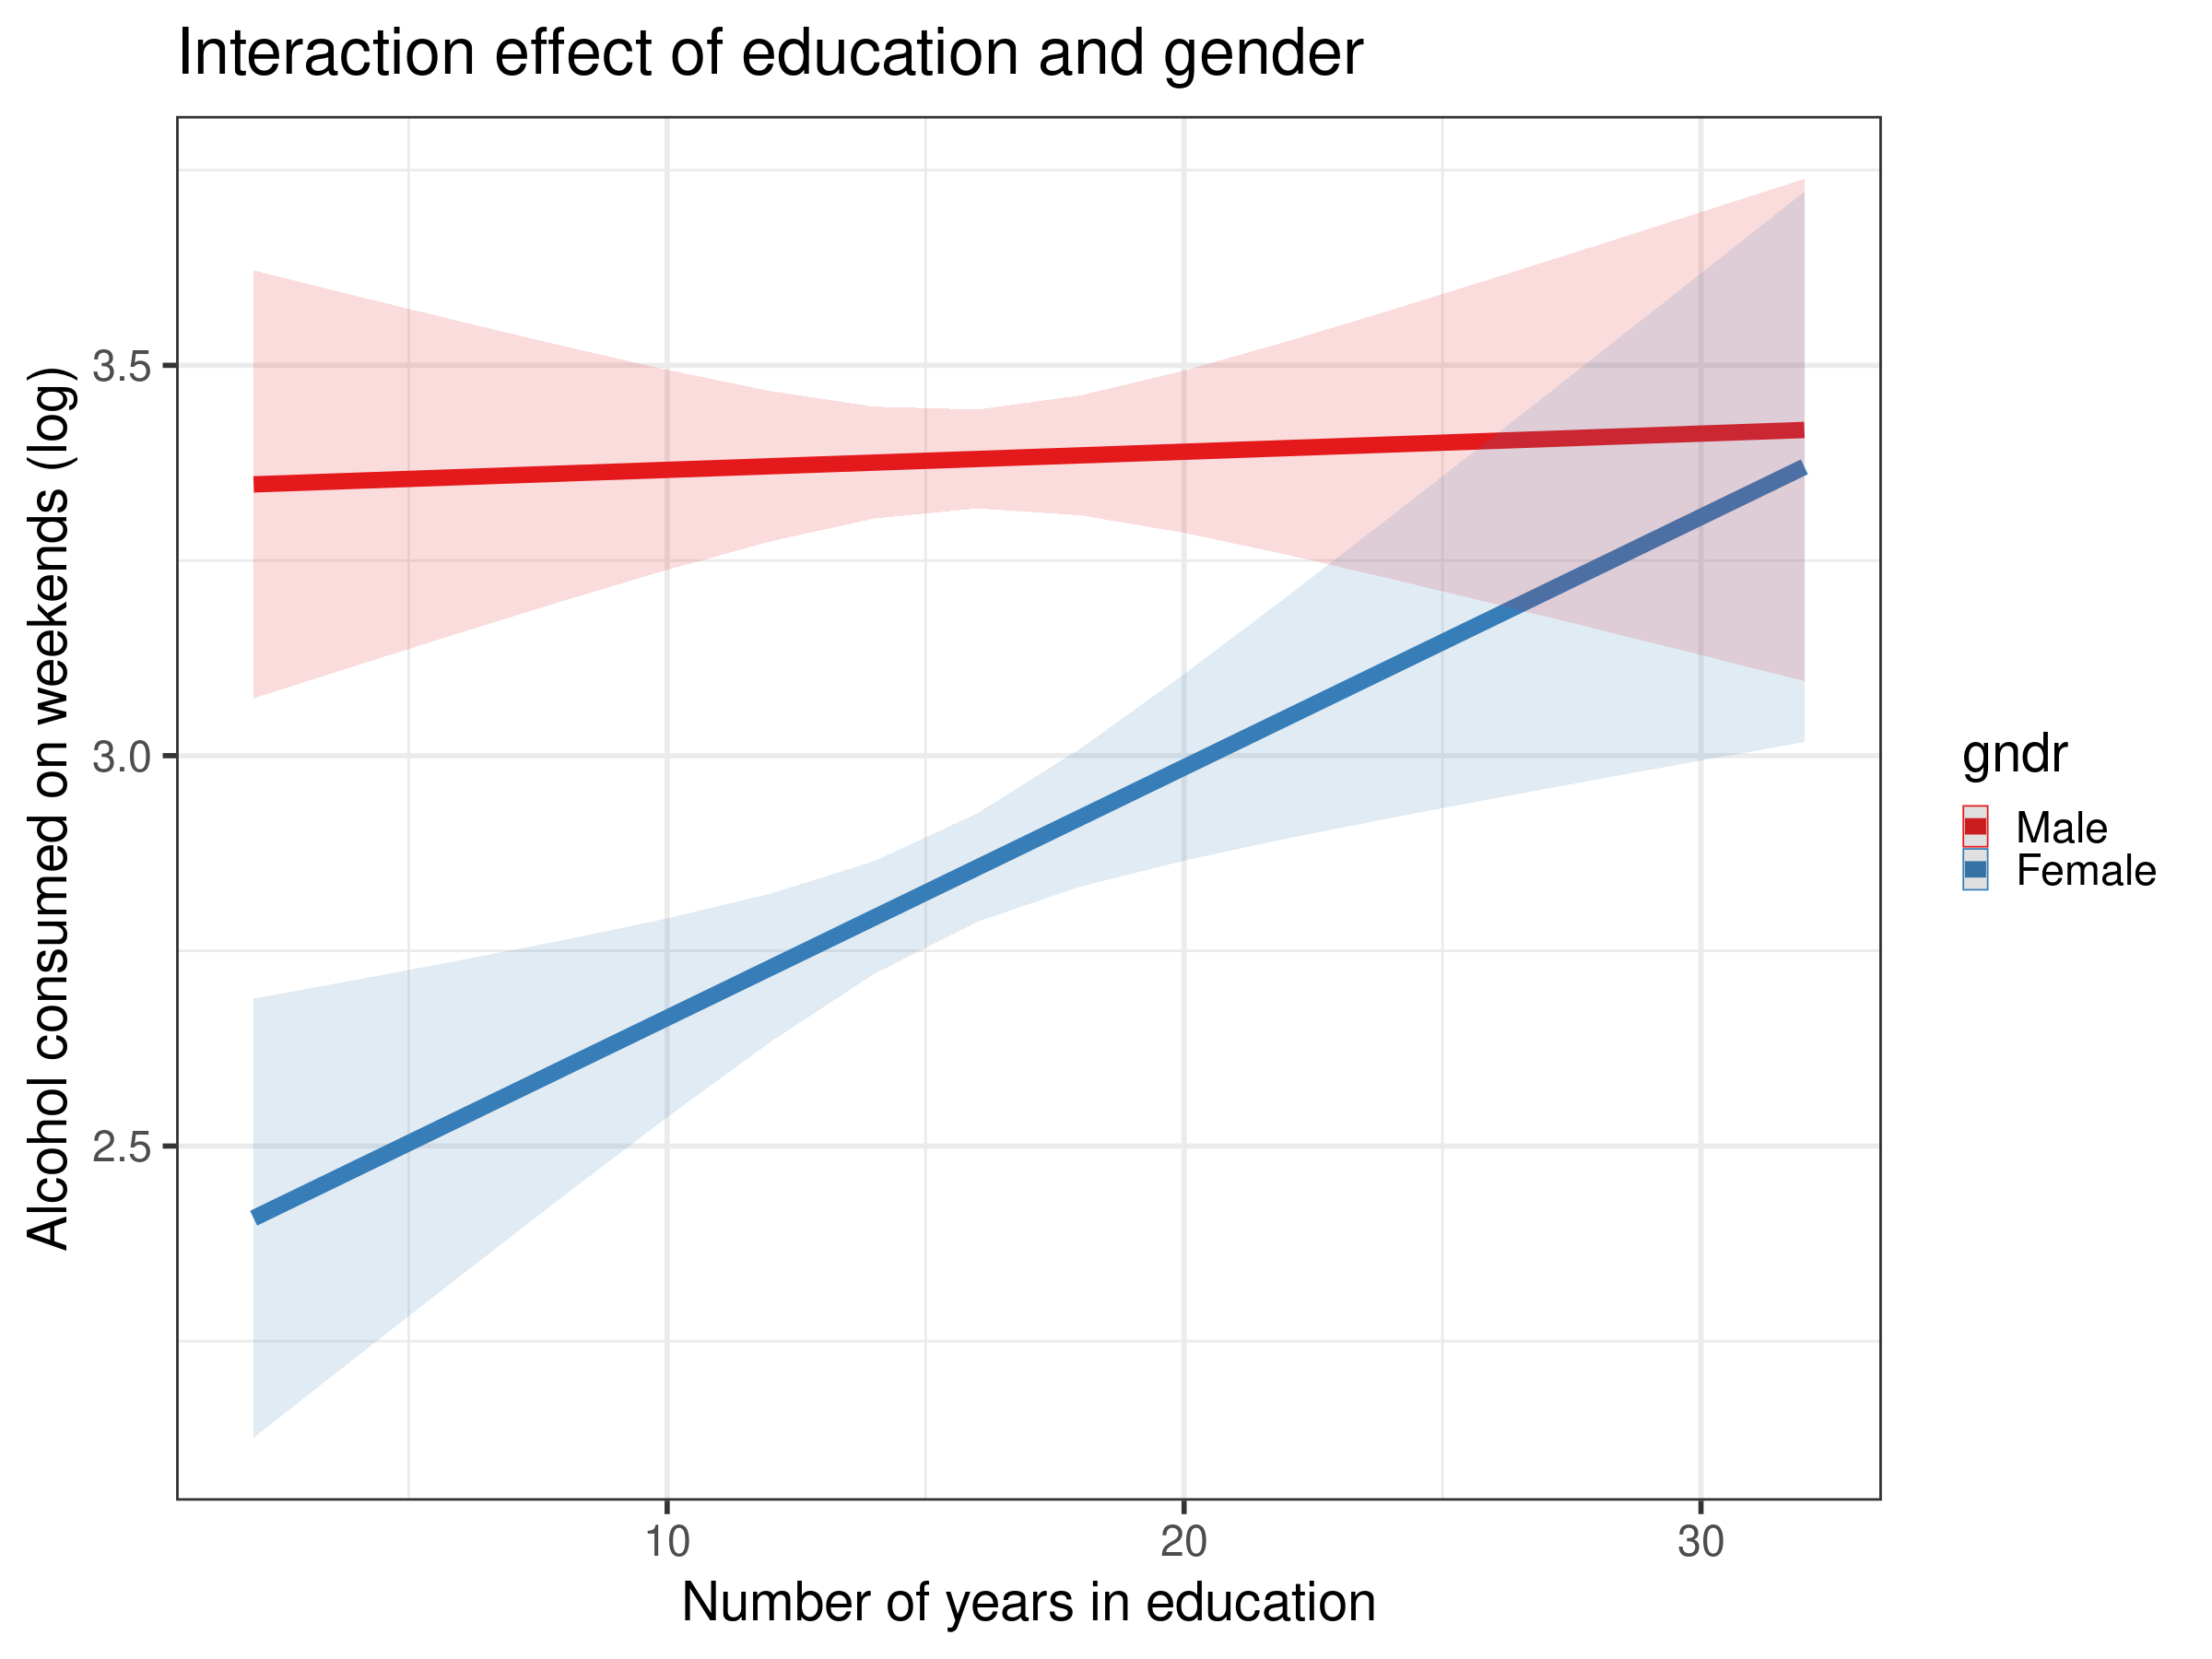

In [15]:
plot_model(modelEndsI, line.size = 5,
           type = "pred", terms=c("eduyrsn", "gndr"),
           title = "Interaction effect of education and gender", 
           axis.title= c("Number of years in education", 
                         "Alcohol consumed on weekends (log)"))

Years of education effects only on females and with lower years of education females consume less alcohol.

For males years of education have no effect at all.

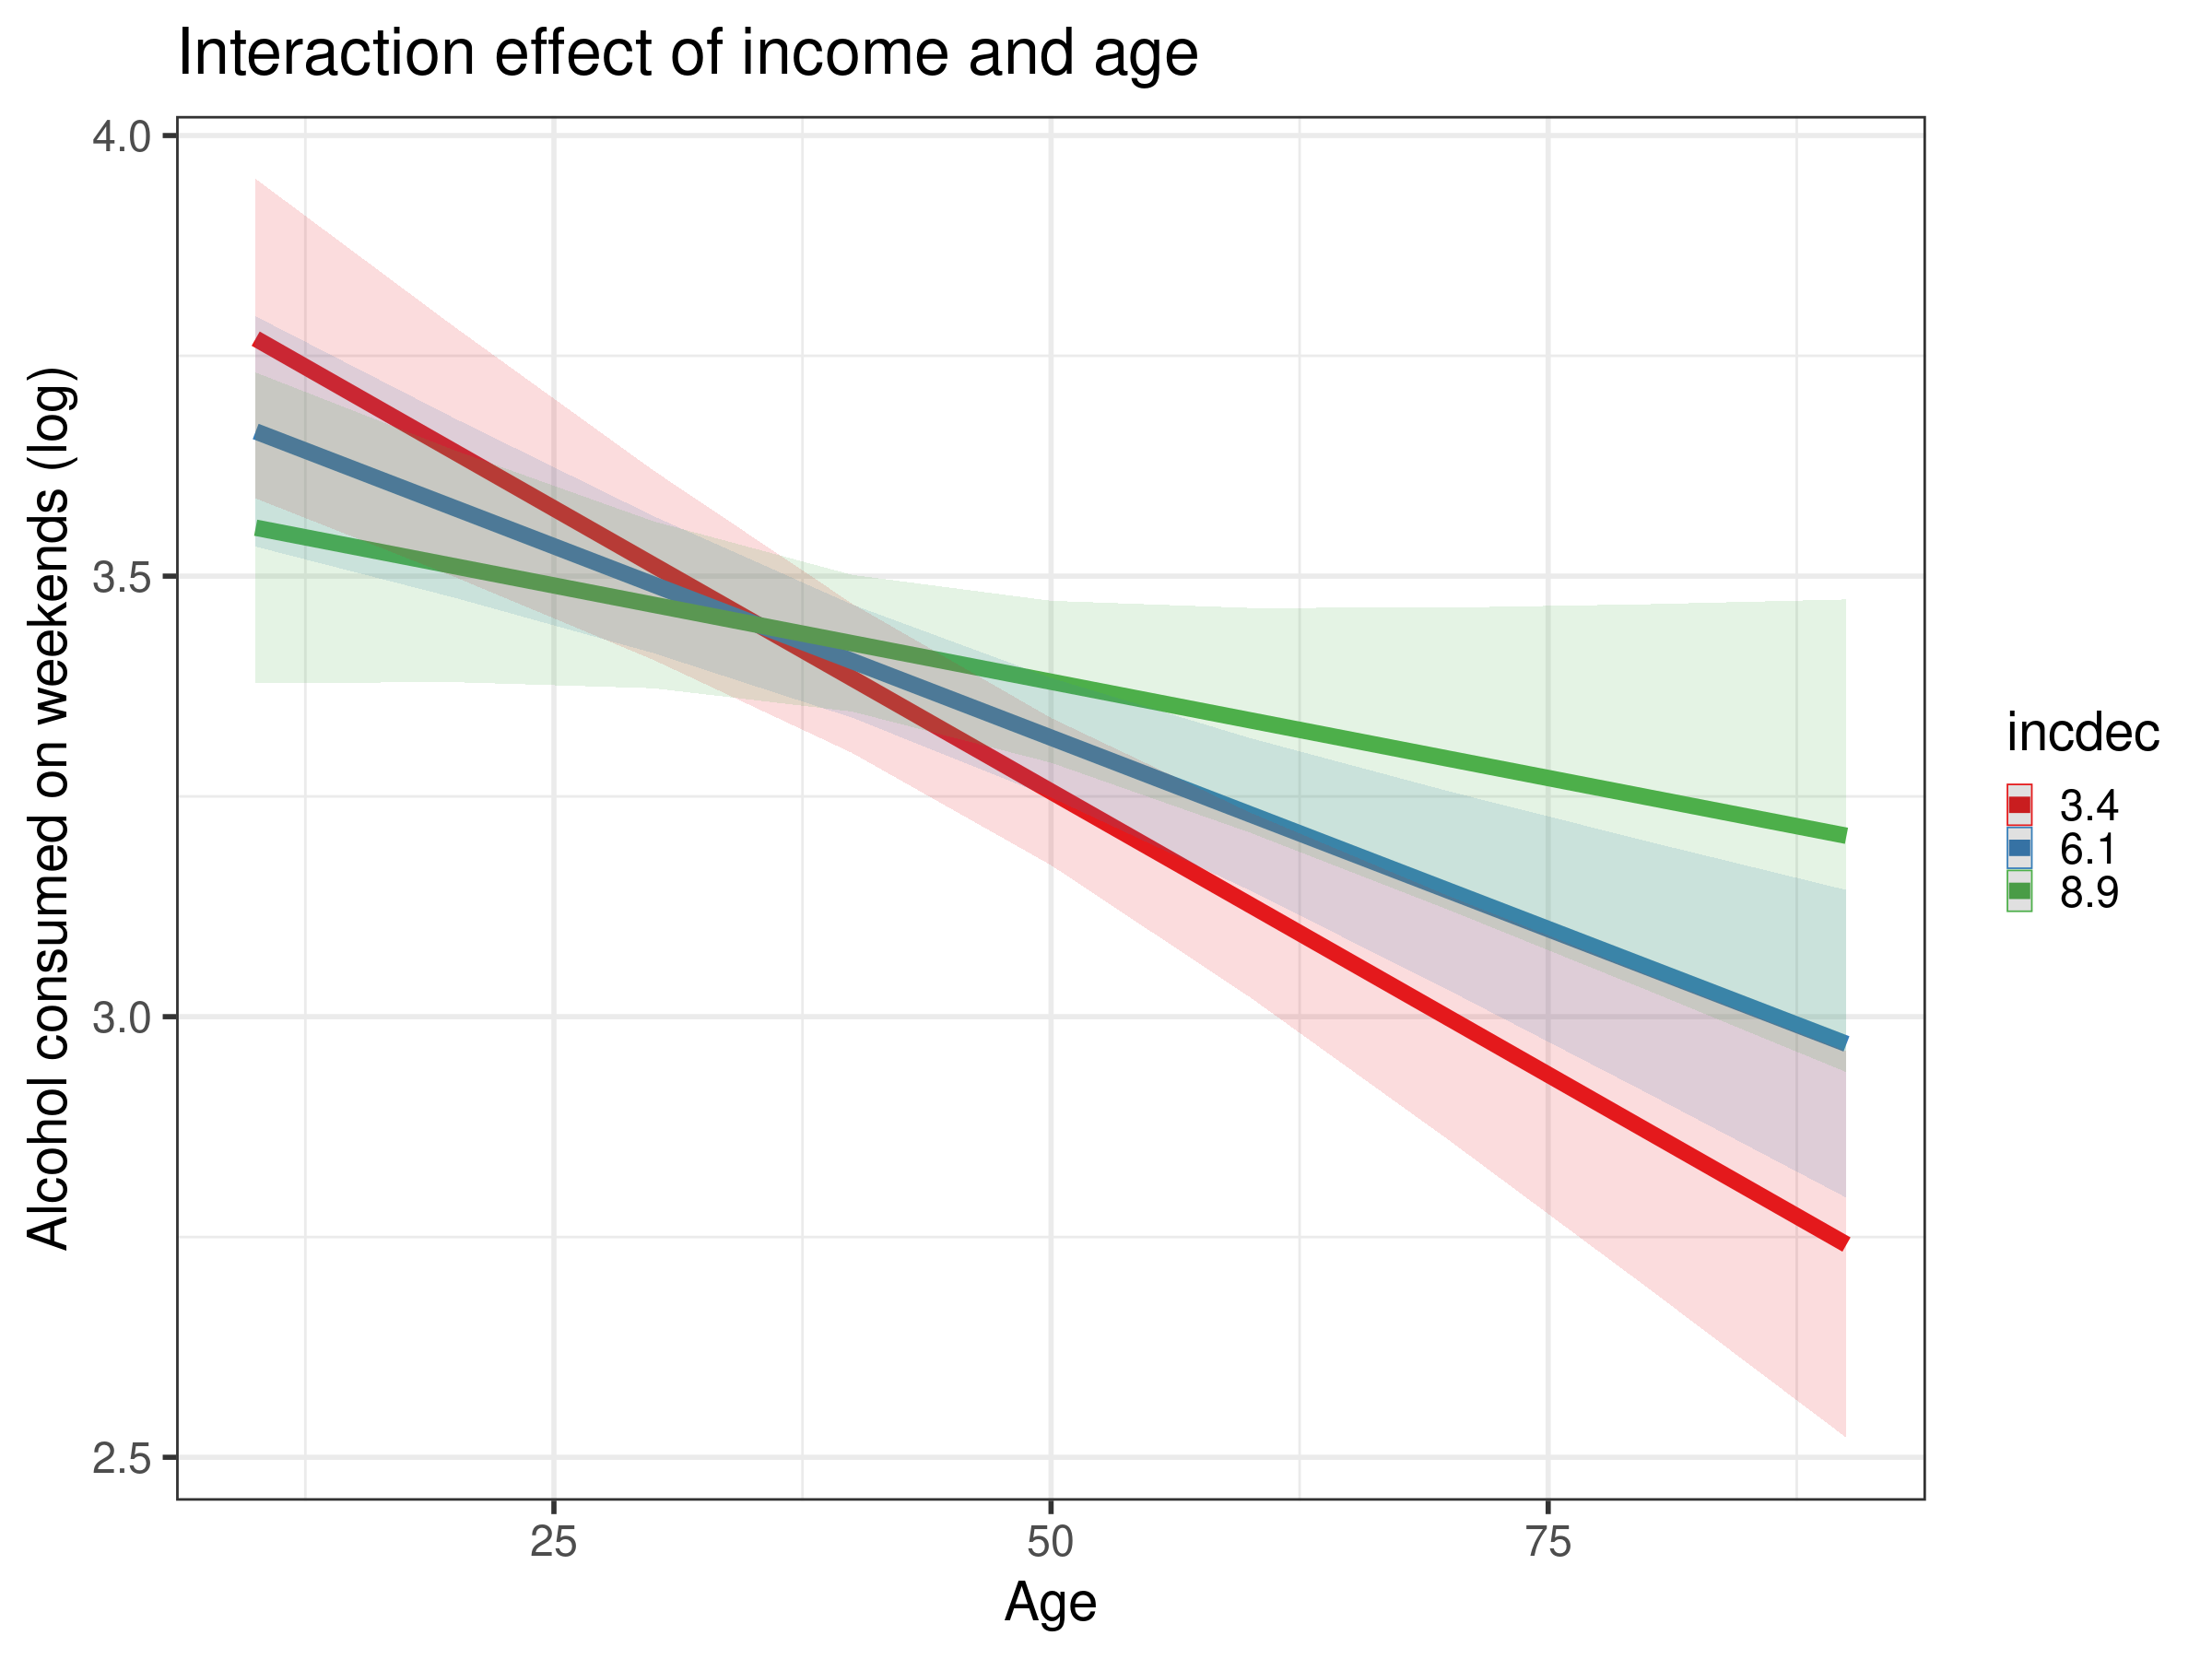

In [16]:
plot_model(modelEndsI, line.size = 5,
           type = "pred", terms=c("age", "incdec"),
           title = "Interaction effect of income and age", 
           axis.title= c("Age", 
                         "Alcohol consumed on weekends (log)"))

Age effects negatively on alcohol consumption but higher income decile group adjust that effect: person on higher income decile group will consume more alcohol with ages than person on lower income decile group.